In [201]:
import pandas as pd
import random
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [90]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
usage = pd.read_csv('takehome_user_engagement.csv')

In [4]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [5]:
usage['time_stamp'] = pd.to_datetime(usage['time_stamp'])
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
usage = usage.sort_values(by='time_stamp').reset_index(drop=True)

In [7]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
usage

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1
...,...,...,...
207912,2014-06-04 23:32:13,4625,1
207913,2014-06-04 23:34:04,9325,1
207914,2014-06-04 23:46:31,9558,1
207915,2014-06-04 23:56:26,341,1


In [9]:
usage.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [10]:
usage = usage.pivot(index='time_stamp', columns='user_id', values='visited')

In [11]:
usage

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
time_stamp,,,,,,,,,,,,,,,,,,,,,
2012-05-31 08:20:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31 15:47:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31 17:19:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31 21:58:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-01 00:17:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-04 23:32:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-04 23:34:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-04 23:46:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
usage = usage.fillna(0)

In [13]:
usage

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
time_stamp,,,,,,,,,,,,,,,,,,,,,
2012-05-31 08:20:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31 15:47:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31 17:19:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-31 21:58:33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-01 00:17:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-04 23:32:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-06-04 23:34:04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-06-04 23:46:31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
usage = usage.resample('W').sum()

In [15]:
usage = usage.T

In [16]:
usage

time_stamp,2012-06-03,2012-06-10,2012-06-17,2012-06-24,2012-07-01,2012-07-08,2012-07-15,2012-07-22,2012-07-29,2012-08-05,...,2014-04-06,2014-04-13,2014-04-20,2014-04-27,2014-05-04,2014-05-11,2014-05-18,2014-05-25,2014-06-01,2014-06-08
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
logins = usage.max(axis=1).reset_index()

In [18]:
logins

,user_id,0
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
8818,11996,1.0
8819,11997,1.0
8820,11998,1.0
8821,11999,1.0


In [19]:
logins.rename(columns={0:'count'}, inplace=True)

In [20]:
logins['adopted_user'] = 0

In [21]:
logins.loc[logins['count'] >= 3,'adopted_user'] = 1

In [22]:
adopted_user_ids = logins.loc[logins['adopted_user'] == 1, 'user_id']

In [23]:
adopted_user_ids = pd.DataFrame(adopted_user_ids)

In [24]:
adopted_user_ids['adopted'] = 1

In [25]:
adopted_user_ids.rename(columns={'user_id':'object_id'}, inplace=True)
adopted_user_ids

,object_id,adopted
1,2,1
7,10,1
13,20,1
24,33,1
28,42,1
...,...,...
8797,11965,1
8798,11967,1
8800,11969,1
8802,11975,1


In [91]:
users = pd.merge(users, adopted_user_ids, how='left', on='object_id')

In [92]:
users['adopted'].fillna(0, inplace=True)

In [93]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0


In [94]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


## 12.04% of users are active

In [95]:
users['adopted'].sum() /users.shape[0]

0.12041666666666667

## Add a sex column
source [data.gov](https://catalog.data.gov/dataset/popular-baby-names/resource/02e8f55e-2157-4cb2-961a-2aabb75cbc8b) - Popular Baby Names. This data set has 57,582 of the most popular baby names, along with their gender. We can merge this dataset with users to get the user sex. The names in the data.gov set match with 99.85% of the names in the users dataframe after the left join on the "name" column.

In [96]:
names = pd.read_csv('Popular_Baby_Names.csv')

In [97]:
names

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


In [98]:
names.drop(columns=['Year of Birth','Ethnicity','Count', 'Rank'], inplace=True)

In [99]:
names.rename(columns={'Gender':'sex', "Child's First Name":'name'}, inplace=True)

In [100]:
names['sex'] = names['sex'].str.lower()
names['name'] = names['name'].str.lower()

In [101]:
names

,sex,name
0,female,geraldine
1,female,gia
2,female,gianna
3,female,giselle
4,female,grace
...,...,...
57577,male,yousef
57578,male,youssef
57579,male,yusuf
57580,male,zachary


In [102]:
users['name'] = users['name'].str.extract(r'(\s.*)')

In [103]:
users['name'] = users['name'].str.strip().str.lower()

In [104]:
users['name_id'] = users.groupby('name').cumcount()
names['name_id'] = names.groupby('name').cumcount()

In [105]:
users = pd.merge(users, names, how='left', on=['name', 'name_id'])

In [106]:
users['sex'].isna().sum() / users.shape[0] 

0.3978333333333333

In [107]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,name_id,sex
0,1,2014-04-22 03:53:30,august,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,male
1,2,2013-11-15 03:45:04,matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,0,male
2,3,2013-03-19 23:14:52,mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,NaN
3,4,2013-05-21 08:09:28,nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,NaN
4,5,2013-01-17 10:14:20,grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,47,female
11996,11997,2013-01-10 18:28:37,amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0,16,female
11997,11998,2014-04-27 12:45:16,jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,13,male
11998,11999,2012-05-31 11:55:59,annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0,10,NaN


In [109]:
(users.sex == 'female').sum()

3485

In [110]:
(users.sex == 'male').sum()

3741

In [115]:
users['sex'].fillna('other', inplace=True)

In [117]:
users.rename(columns={'sex':'common_name'}, inplace=True)

## Regex on the email column to get email domains

In [124]:
users['email']

0          @yahoo.com
1          @gustr.com
2          @gustr.com
3          @yahoo.com
4          @yahoo.com
             ...     
11995      @gustr.com
11996      @gmail.com
11997       @cuvox.de
11998      @iuxiw.com
11999    @hotmail.com
Name: email, Length: 12000, dtype: object

In [128]:
users['email'] = users['email'].str.extract(r'(@.*)')
users['email'] = users['email'].str.strip('@')

In [130]:
users['email'] = users['email'].str.extract(r'^(.*?)\.')

In [131]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,name_id,common_name
0,1,2014-04-22 03:53:30,august,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,0,male
1,2,2013-11-15 03:45:04,matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,0,male
2,3,2013-03-19 23:14:52,mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,0,other
3,4,2013-05-21 08:09:28,nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,0,other
4,5,2013-01-17 10:14:20,grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,sophia,gustr,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0,47,female
11996,11997,2013-01-10 18:28:37,amelie,gmail,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0.0,16,female
11997,11998,2014-04-27 12:45:16,jake,cuvox,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0,13,male
11998,11999,2012-05-31 11:55:59,annett,iuxiw,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0.0,10,other


In [133]:
users.drop(columns=['object_id', 'creation_time','name','last_session_creation_time','org_id',
                   'name_id'], inplace=True)

In [136]:
users

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,common_name
0,yahoo,GUEST_INVITE,1,0,10803.0,0.0,male
1,gustr,ORG_INVITE,0,0,316.0,1.0,male
2,gustr,ORG_INVITE,0,0,1525.0,0.0,other
3,yahoo,GUEST_INVITE,0,0,5151.0,0.0,other
4,yahoo,GUEST_INVITE,0,0,5240.0,0.0,female
...,...,...,...,...,...,...,...
11995,gustr,ORG_INVITE,0,0,8263.0,0.0,female
11996,gmail,SIGNUP_GOOGLE_AUTH,0,0,NaN,0.0,female
11997,cuvox,GUEST_INVITE,1,1,8074.0,0.0,male
11998,iuxiw,PERSONAL_PROJECTS,0,0,NaN,0.0,other


In [138]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   email                       12000 non-null  object 
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   invited_by_user_id          6417 non-null   float64
 5   adopted                     12000 non-null  float64
 6   common_name                 12000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 750.0+ KB


In [142]:
users.drop(columns='invited_by_user_id', inplace=True)

### Balancing the classes

In [166]:
non_users = users[users['adopted'] == 0]
true_users = users[users['adopted'] == 1]

In [167]:
true_users

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,common_name
1,gustr,ORG_INVITE,0,0,1.0,male
9,gustr,ORG_INVITE,1,1,1.0,female
19,uhzdq,SIGNUP,0,0,1.0,female
32,cuvox,GUEST_INVITE,0,0,1.0,other
41,cuvox,SIGNUP,1,0,1.0,female
...,...,...,...,...,...,...
11964,cuvox,GUEST_INVITE,0,0,1.0,other
11966,gmail,GUEST_INVITE,0,0,1.0,male
11968,hotmail,GUEST_INVITE,1,1,1.0,male
11974,gustr,GUEST_INVITE,1,0,1.0,other


In [171]:
non_users1 = users.sample(n=1445, random_state=42)
non_users1

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,common_name
1935,jourrapide,ORG_INVITE,0,0,0.0,female
6494,gmail,ORG_INVITE,0,1,0.0,female
1720,jourrapide,ORG_INVITE,1,0,0.0,female
9120,yahoo,GUEST_INVITE,0,0,0.0,female
360,gustr,PERSONAL_PROJECTS,1,1,0.0,female
...,...,...,...,...,...,...
4782,gustr,GUEST_INVITE,0,0,0.0,other
4220,yahoo,ORG_INVITE,0,0,0.0,other
6551,gmail,ORG_INVITE,1,0,0.0,other
3678,yahoo,SIGNUP,0,0,0.0,other


In [172]:
pre_users = pd.concat([true_users, non_users1], axis=0, ignore_index=True)

In [173]:
pre_users

,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,common_name
0,gustr,ORG_INVITE,0,0,1.0,male
1,gustr,ORG_INVITE,1,1,1.0,female
2,uhzdq,SIGNUP,0,0,1.0,female
3,cuvox,GUEST_INVITE,0,0,1.0,other
4,cuvox,SIGNUP,1,0,1.0,female
...,...,...,...,...,...,...
2885,gustr,GUEST_INVITE,0,0,0.0,other
2886,yahoo,ORG_INVITE,0,0,0.0,other
2887,gmail,ORG_INVITE,1,0,0.0,other
2888,yahoo,SIGNUP,0,0,0.0,other


## Modeling

In [191]:
X = pre_users.drop(columns='adopted')
y = pre_users['adopted']

In [192]:
X= pd.get_dummies(X)

In [193]:
X.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'email_amknl',
       'email_aosyq', 'email_bdlvv', 'email_bgdtm', 'email_bhisp',
       'email_bhjwj', 'email_bikch', 'email_binqn',
       ...
       'email_zpbkw', 'email_zpcpu', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'common_name_female', 'common_name_male', 'common_name_other'],
      dtype='object', length=288)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
model = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)

In [196]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)

0.5934256055363322

In [199]:
report = classification_report(preds, y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.06      0.68      0.11        22
         1.0       0.98      0.59      0.74       556

    accuracy                           0.59       578
   macro avg       0.52      0.64      0.42       578
weighted avg       0.94      0.59      0.71       578



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


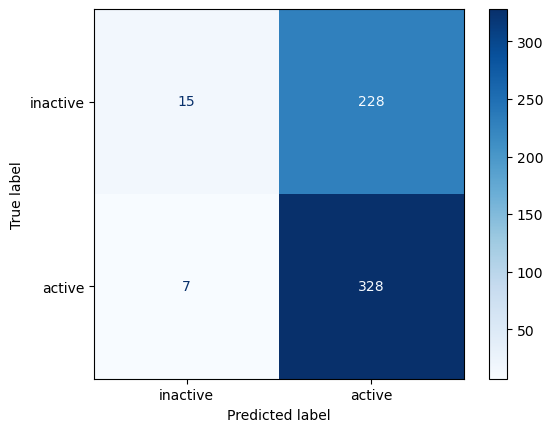

In [203]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['inactive', 'active'])
plt.savefig("confusion matrix.png", dpi=400)

In [206]:
def rf(xs, y, n_estimators=40, max_samples=100,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [208]:
m = rf(X_train, y_train)

In [217]:
preds = m.predict(X_test)
accuracy_score(preds, y_test)

0.5986159169550173

In [209]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [210]:
fi = rf_feat_importance(m, X_train)
fi[:10]

,cols,imp
280,creation_source_GUEST_INVITE,0.091232
282,creation_source_PERSONAL_PROJECTS,0.086913
286,common_name_male,0.079963
287,common_name_other,0.079743
263,email_yahoo,0.077066
281,creation_source_ORG_INVITE,0.073730
285,common_name_female,0.073581
0,opted_in_to_mailing_list,0.068998
283,creation_source_SIGNUP,0.064851
72,email_gmail,0.060908


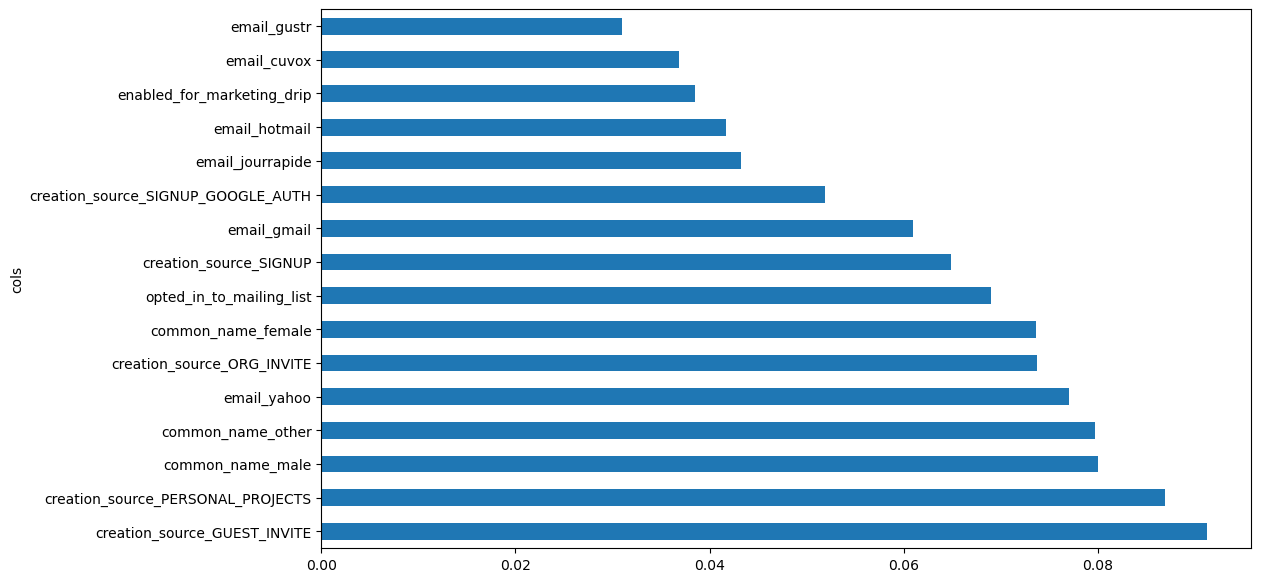

In [215]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:16]);
plt.savefig("fi.png", dpi=400)